In [1]:
import time
Start_time = time.time()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

Logistic Regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.


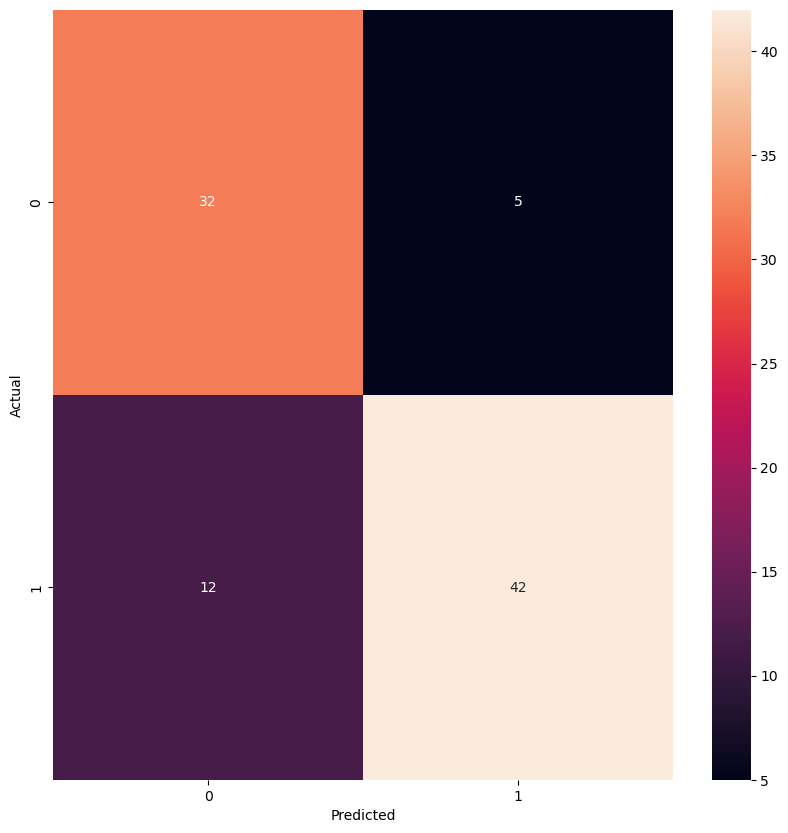

accuracy_score_logistic : 0.8131868131868132
Misclassified Samples : 4115
Classified Samples: 4166


In [2]:
#Logistic Regression
data = pd.read_csv(r"C:\Users\samba\Downloads\heart.csv")
data.head()
data.isna().sum().sum()
data.isnull().sum().sum()
data.info()
data = data.astype("float64")

features = list(set(data.columns)-set(["output"]))
target = list(["output"])

x = data[features].values
y = data[target].values

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state=0)

scaler = StandardScaler()
scaler.fit(train_x)
train_x =scaler.transform(train_x)
test_x = scaler.transform(test_x)

logistic = LogisticRegression()
logistic.fit(train_x,train_y.ravel())

pred_logistic = logistic.predict(test_x)
print(pred_logistic)

confusion_matrix = confusion_matrix(pred_logistic,test_y)
print(confusion_matrix)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy_logistic = accuracy_score(pred_logistic,test_y)
print("accuracy_score_logistic :",accuracy_logistic)

print("Misclassified Samples :",(test_y != pred_logistic).sum())
print("Classified Samples:",(test_y == pred_logistic).sum())

In [3]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


KNN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
[0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.


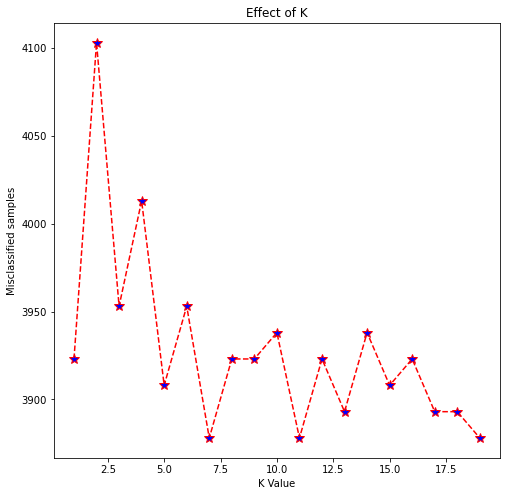

In [3]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\samba\Downloads\heart.csv")
data.head()
data.isna().sum().sum()
data.isnull().sum().sum()
data.info()
data = data.astype("float64")

features = list(set(data.columns)-set(["output"]))
target = list(["output"])

x = data[features].values
y = data[target].values

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state=3)

scaler = StandardScaler()
scaler.fit(train_x)
train_x =scaler.transform(train_x)
test_x = scaler.transform(test_x)

KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(train_x,train_y.ravel())

pred_KNN = KNN.predict(test_x)
print(pred_KNN)
#confusion_matrix = confusion_matrix(test_y.ravel(),pred_KNN)
#print(confusion_matrix)
accuracy_KNN = accuracy_score(test_y,pred_KNN)
print("accuracy_KNN:",accuracy_KNN)

'''import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''


print('Misclassified samples: %d' % (test_y != pred_KNN).sum())

Misclassifiedsample = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x,train_y.ravel())
    pred_i = knn.predict(test_x)
    Misclassifiedsample.append((test_y !=pred_i).sum())
print(Misclassifiedsample)

plt.figure(figsize=(8,8))
plt.plot(range(1,20,1),Misclassifiedsample,color = 'red',linestyle = 'dashed',
         marker = '*',markerfacecolor = 'blue',markersize =10)
plt.title("Effect of K")
plt.xlabel("K Value")
plt.ylabel("Misclassified samples")
plt.show()

In [4]:
# RandomForest Classifier
from sklearn.metrics import mean_squared_error
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv(r"C:\Users\samba\Downloads\heart.csv")
data.head()
data.isna().sum().sum()
data.isnull().sum().sum()
data.info()
data = data.astype("float64")

features = list(set(data.columns)-set(["output"]))
target = list(["output"])

x = data[features].values
y = data[target].values

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state=1)

base_pred = data[target].mean().values
base_pred = np.repeat(base_pred,len(test_y))

base_rmse = (mean_squared_error(test_y,base_pred))**0.5

scaler = StandardScaler()
scaler.fit(train_x)
train_x =scaler.transform(train_x)
test_x = scaler.transform(test_x)

rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(train_x,train_y.ravel())

pred_rf = rf.predict(test_x)

rf_rmse = (mean_squared_error(test_y,pred_rf))**0.5
rf_rmse

#confusion_matrix = confusion_matrix(test_y.ravel(),pred_rf)
#print(confusion_matrix)

"""import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'"""

accuracy_RF = accuracy_score(test_y,pred_rf)
print("accuracy_RF:",accuracy_RF)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
accuracy_RF: 0.7692307692307693


In [5]:
# SVM
from seaborn import pairplot
from sklearn.svm import SVC
data = pd.read_csv(r"C:\Users\samba\Downloads\heart.csv")
data.head()
data.isna().sum().sum()
data.isnull().sum().sum()
data.info()
data = data.astype("float64")

features = list(set(data.columns)-set(["output"]))
target = list(["output"])
x = data[features].values
y = data[target].values

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state=100)

clf = SVC(kernel = 'linear')
clf.fit(train_x,train_y.ravel())

pred_clf = clf.predict(test_x)
print(pred_clf[:5])
#confusion_matrix = confusion_matrix(test_y.ravel(),pred_clf)
#print(confusion_matrix)

'''import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

accuracy_clf = accuracy_score(test_y,pred_clf)
print("accuracy_SVM:",accuracy_clf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
[1. 0. 0. 1. 1.]
accuracy_SVM: 0.8241758241758241


In [6]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
data = pd.read_csv(r"C:\Users\samba\Downloads\heart.csv")
data.head()
data.isna().sum().sum()
data.isnull().sum().sum()
data.info()
data = data.astype("float64")

features = list(set(data.columns)-set(["output"]))
target = list(["output"])
x = data[features].values
y = data[target].values

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state=100)
clf_gini = DecisionTreeClassifier(criterion = 'gini',random_state=100,max_depth = 3,min_samples_leaf = 5)
clf_gini.fit(train_x,train_y)
pred_DT = clf_gini.predict(test_x)
#confusion_matrix = confusion_matrix(test_y.ravel(),pred_DT)
#print(confusion_matrix)

'''import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

accuracy_DT = accuracy_score(test_y,pred_DT)
print("accuracy_DT:",accuracy_DT)

classification_report(test_y,pred_DT)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
accuracy_DT: 0.8241758241758241


'              precision    recall  f1-score   support\n\n         0.0       0.88      0.76      0.81        46\n         1.0       0.78      0.89      0.83        45\n\n    accuracy                           0.82        91\n   macro avg       0.83      0.82      0.82        91\nweighted avg       0.83      0.82      0.82        91\n'

In [8]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [7]:

print("Accuracy Details of Different algorithms")
print("accuracy_score_logistic :",accuracy_logistic)
print("accuracy_KNN:",accuracy_KNN)
print("accuracy_RF:",accuracy_RF)
print("accuracy_SVM:",accuracy_clf)
print("accuracy_DT:",accuracy_DT)
End_time = time.time()
print(Start_time)
print(End_time)
print('Time taken:',End_time-Start_time)

Accuracy Details of Different algorithms
accuracy_score_logistic : 0.8131868131868132
accuracy_KNN: 0.8571428571428571
accuracy_RF: 0.7692307692307693
accuracy_SVM: 0.8241758241758241
accuracy_DT: 0.8241758241758241
1668850341.6946995
1668850347.9465852
Time taken: 6.251885652542114
